<h1 style="text-align:center;color:rgb(220, 75, 60);font-weight:800;font-size:50px">HOUSE RENT PREDICTION<h1/>

<img src="https://timesnewsblog.com/wp-content/uploads/2022/02/Rent-out.jpg">

# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:150px">Context</div>

<p style="background-color:rgba(244,164,96, 0.3);padding:10px 10px;border-radius:5px 25px 25px 5px;width:1000px;font-size:16px">Housing in India varies from palaces of erstwhile maharajas to modern apartment buildings in big cities to tiny huts in far-flung villages. There has been tremendous growth in India's housing sector as incomes have risen. The Human Rights Measurement Initiative finds that India is doing 60.9% of what should be possible at its level of income for the right to housing.
<br/>
Renting, also known as hiring or letting, is an agreement where a payment is made for the temporary use of a good, service, or property owned by another. A gross lease is when the tenant pays a flat rental amount and the landlord pays for all property charges regularly incurred by the ownership. Renting can be an example of the sharing economy.<p/>

# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:230px">Data Glossary</div>

<p style="background-color:rgba(244,164,96, 0.3);padding:10px 10px;border-radius:5px 25px 25px 5px;width:1000px;font-size:16px;line-height:2.2">
    <b>BHK</b>:&nbsp;&nbsp; Number of Bedrooms, Hall, Kitchen.<br/>
    <b>Rent</b>:&nbsp;&nbsp; Price of the Houses/Apartments/Flats.<br/>
    <b>Size</b>:&nbsp;&nbsp; Size of the Houses/Apartments/Flats in Square Feet.<br/>
    <b>Floor</b>:&nbsp;&nbsp; Houses/Apartments/Flats situated in which Floor and Total Number of Floors (Example: Ground out of 2, 3 out of 5, etc.)<br/>
    <b>Area Type</b>:&nbsp;&nbsp; Size of the Houses/Apartments/Flats calculated on either Super Area or Carpet Area or Build Area.<br/>
    <b>Area Locality</b>:&nbsp;&nbsp; Locality of the Houses/Apartments/Flats.<br/>
    <b>City</b>:&nbsp;&nbsp; City where the Houses/Apartments/Flats are Located.<br/>
    <b>Furnishing Status</b>:&nbsp;&nbsp; Furnishing Status of the Houses/Apartments/Flats, either it is Furnished or Semi-Furnished or Unfurnished.<br/>
    <b>Tenant Preferred</b>:&nbsp;&nbsp; Type of Tenant Preferred by the Owner or Agent.<br/>
    <b>Bathroom</b>:&nbsp;&nbsp; Number of Bathrooms.<br/>
    <b>Point of Contact</b>:&nbsp;&nbsp; Whom should you contact for more information regarding the Houses/Apartments/Flats.<p/>

# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:550px">Importing Libraries and Loading Data</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../input/house-rent-prediction-dataset/House_Rent_Dataset.csv')
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:400px">Exploratory Data Analysis</div>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [4]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [5]:
data.isnull().sum()

Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

#### There are no missing values in the data.

In [6]:
df = data.select_dtypes('O')
df

,Posted On,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Point of Contact
0,2022-05-18,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
1,2022-05-13,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
2,2022-05-16,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,Contact Owner
3,2022-07-04,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,Contact Owner
4,2022-05-09,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,Contact Owner
...,...,...,...,...,...,...,...,...
4741,2022-05-18,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4742,2022-05-15,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Owner
4743,2022-07-10,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,Contact Agent
4744,2022-07-06,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,Contact Agent


In [7]:
[(df.columns[i], df.iloc[:, i].unique().shape[0]) for i in range(len(df.columns))]

[('Posted On', 81),
 ('Floor', 480),
 ('Area Type', 3),
 ('Area Locality', 2235),
 ('City', 6),
 ('Furnishing Status', 3),
 ('Tenant Preferred', 3),
 ('Point of Contact', 3)]

#### There are too much unique values in 'Area Locality' column and they may hardly help in producing significant model fit.

The 'Floor' column tells us about house situated in which floor along with the total floors present in the building. So making separate columns as 'Floor' and 'Total Floors'.

In [8]:
data.drop(columns='Area Locality', inplace=True)
data["Total Floors"] = data["Floor"].apply(lambda floor:floor.split()[-1])
data["Floor"] = data["Floor"].apply(lambda floor:floor.split()[0])
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,Ground,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:300px">Data Visualization</div>

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:250px">House Rent in Different Cities

In [9]:
city_count = data['City'].value_counts()
px.pie(labels=city_count.index.tolist(), values=city_count.tolist(), names=city_count.index.tolist(), hole=0.4, title='House Rent in different Cities')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:230px">Area Type of the Houses

In [10]:
at_count = data['Area Type'].value_counts()
px.pie(labels=at_count.index.tolist(), values=at_count.tolist(), names=at_count.index, hole=0.4, title='Area type of the houses')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:280px">Furnishing Status of the Houses

In [11]:
fs_count = data['Furnishing Status'].value_counts()
px.pie(labels=fs_count.index.tolist(), values=fs_count.tolist(), names=fs_count.index, hole=0.4, title='Furnishing Status of the houses')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:150px">Tenant Preferred

In [12]:
tp_count = data['Tenant Preferred'].value_counts()
px.pie(labels=tp_count.index.tolist(), values=tp_count.tolist(), names=tp_count.index, hole=0.4, title='Tenant preferred')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:330px">Average Rental Value in Different Cities

In [13]:
C = data['City'].unique().tolist()
avg_rent = [data['Rent'].loc[data['City']==i].sum()/data['Rent'].loc[data['City']==i].shape[0] for i in C]

px.bar(x=C, y=avg_rent, color=avg_rent, color_continuous_scale='Aggrnyl')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:330px">Distribution of the Size of the Houses

In [14]:
px.histogram(data, x="Size", color_discrete_sequence=['crimson'])

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:280px">Distribution of the Rental Values

In [15]:
px.histogram(data, x="Rent", color_discrete_sequence=['darkblue'])

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:350px">Distribution of Total Bathrooms in a House

In [16]:
px.histogram(data, x="Bathroom", color_discrete_sequence=['seagreen'])

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:350px">Distribution of the Total Floors in building

In [17]:
df1 = data.select_dtypes('O')
[print(df1.iloc[:, i].unique(), '\n') for i in range(len(df1.columns))]

encodes = {"Floor":     {"Ground": 0, "Upper": 999, "Lower": -1},
           "Total Floors": {"Ground": 0}}

data = data.replace(encodes)
data.head()

['2022-05-18' '2022-05-13' '2022-05-16' '2022-07-04' '2022-05-09'
 '2022-04-29' '2022-06-21' '2022-06-07' '2022-06-20' '2022-05-23'
 '2022-05-14' '2022-05-05' '2022-06-01' '2022-05-17' '2022-06-09'
 '2022-07-02' '2022-06-14' '2022-06-15' '2022-05-28' '2022-05-22'
 '2022-06-18' '2022-06-25' '2022-06-22' '2022-05-21' '2022-06-26'
 '2022-06-16' '2022-06-29' '2022-05-10' '2022-05-12' '2022-06-03'
 '2022-05-31' '2022-06-10' '2022-06-24' '2022-04-30' '2022-05-27'
 '2022-06-06' '2022-05-20' '2022-05-26' '2022-07-03' '2022-04-23'
 '2022-06-19' '2022-07-06' '2022-06-04' '2022-05-30' '2022-06-08'
 '2022-05-03' '2022-05-07' '2022-06-27' '2022-05-15' '2022-04-28'
 '2022-06-28' '2022-06-23' '2022-06-13' '2022-05-04' '2022-04-25'
 '2022-05-06' '2022-06-30' '2022-07-01' '2022-06-17' '2022-06-11'
 '2022-05-11' '2022-06-12' '2022-06-05' '2022-05-25' '2022-05-24'
 '2022-05-19' '2022-04-24' '2022-04-27' '2022-05-08' '2022-04-26'
 '2022-06-02' '2022-05-29' '2022-07-07' '2022-07-08' '2022-07-09'
 '2022-07-

,Posted On,BHK,Rent,Size,Floor,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Total Floors
0,2022-05-18,2,10000,1100,0,Super Area,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,2
1,2022-05-13,2,20000,800,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
2,2022-05-16,2,17000,1000,1,Super Area,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,3
3,2022-07-04,2,10000,800,1,Super Area,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner,2
4,2022-05-09,2,7500,850,1,Carpet Area,Kolkata,Unfurnished,Bachelors,1,Contact Owner,2


In [18]:
Tot_fl = data['Total Floors'].astype(int).sort_values()
print(Tot_fl)
fig = px.histogram(Tot_fl, x="Total Floors", color_discrete_sequence=['orangered'])
fig.show()

2883     0
3769     1
353      1
3699     1
351      1
        ..
651     78
579     78
1482    81
1425    85
601     89
Name: Total Floors, Length: 4746, dtype: int64


# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:300px">Data Preprocessing</div>

In [19]:
data = pd.get_dummies(data, columns=['Area Type', 'City', 'Furnishing Status', 'Tenant Preferred', 'Point of Contact'])
data.head()

,Posted On,BHK,Rent,Size,Floor,Bathroom,Total Floors,Area Type_Built Area,Area Type_Carpet Area,Area Type_Super Area,...,City_Mumbai,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner
0,2022-05-18,2,10000,1100,0,2,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
1,2022-05-13,2,20000,800,1,1,3,0,0,1,...,0,0,1,0,0,1,0,0,0,1
2,2022-05-16,2,17000,1000,1,1,3,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3,2022-07-04,2,10000,800,1,1,2,0,0,1,...,0,0,0,1,0,1,0,0,0,1
4,2022-05-09,2,7500,850,1,1,2,0,1,0,...,0,0,0,1,1,0,0,0,0,1


In [20]:
data.drop(columns='Posted On', inplace=True)

In [21]:
data.corr()['Rent'].sort_values(ascending=False)

Rent                                 1.000000
Bathroom                             0.441215
Size                                 0.413551
BHK                                  0.369718
Point of Contact_Contact Agent       0.339750
City_Mumbai                          0.327038
Area Type_Carpet Area                0.215769
Furnishing Status_Furnished          0.110576
Tenant Preferred_Family              0.063941
Furnishing Status_Semi-Furnished     0.045309
Tenant Preferred_Bachelors           0.042151
Point of Contact_Contact Builder    -0.005482
Area Type_Built Area                -0.006439
City_Delhi                          -0.027072
City_Bangalore                      -0.061512
Tenant Preferred_Bachelors/Family   -0.078774
City_Chennai                        -0.082361
City_Hyderabad                      -0.087465
City_Kolkata                        -0.105322
Furnishing Status_Unfurnished       -0.126271
Area Type_Super Area                -0.215499
Point of Contact_Contact Owner    

In [22]:
data = data.loc[data['Rent']<=100000]

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:150px">Target Setting

In [23]:
X = data.drop(columns=['Rent'], axis=1)
y = data['Rent']

In [24]:
X.shape, y.shape

((4466, 23), (4466,))

In [25]:
X, y = X.astype('int64'),y.astype('int64')

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:330px">Splitting Data into Train and Test Sets

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=42)
(y_train.shape, y_test.shape)

((3126,), (1340,))

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px 10px;border-radius:5px 25px 25px 5px;width:250px">Feature and Target Scaling

From the distribution of Rental Values we can see that the range of the target data varies widely, so the large values which are very less can put more impact in training the model and may give us inappropriate fit.

So, we do Feature Scaling to normalize the data.

In [27]:
y_train = np.array(y_train).reshape(y_train.shape[0], 1)
mms_X = MinMaxScaler()
mms_y = MinMaxScaler()
X_train = mms_X.fit_transform(X_train)
y_train = mms_y.fit_transform(y_train)

# <div style="background-color:rgba(220, 75, 60, 0.75);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:250px">Model Building</div>

In [28]:
model = RandomForestRegressor(n_estimators=700, max_depth=70, min_samples_leaf=3, min_samples_split= 5,random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=3, min_samples_split=5,
                      n_estimators=700, random_state=42)

In [29]:
y_pred = model.predict(mms_X.transform(X_test.values))

Inverse Transform to rescale the values back.

In [30]:
y_pred = mms_y.inverse_transform(y_pred.reshape(len(y_test), 1))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 5767.9   5000.  ]
 [73783.07 53000.  ]
 [19511.48 25000.  ]
 ...
 [13079.28 10000.  ]
 [50774.57 55000.  ]
 [24555.3  35000.  ]]


In [31]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.7054801338648788

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:200px">Hyperparameter Tuning

In [32]:
def fine_tune(model, param_grid):
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True, random_state=42)
    grid_search.fit(X_train, y_train)
    return grid_search.best_params_, np.sqrt((-1)*grid_search.best_score_)

In [33]:
param_grid = [{'n_estimators': [300, 500, 700], 'max_depth': [40, 60, 80], 'min_samples_leaf': [3, 5, 7, 9], 'min_samples_split': [5, 11, 15]}]
fine_tune(model, param_grid)

({'n_estimators': 700,
  'min_samples_split': 11,
  'min_samples_leaf': 3,
  'max_depth': 80},
 0.10231726486954887)

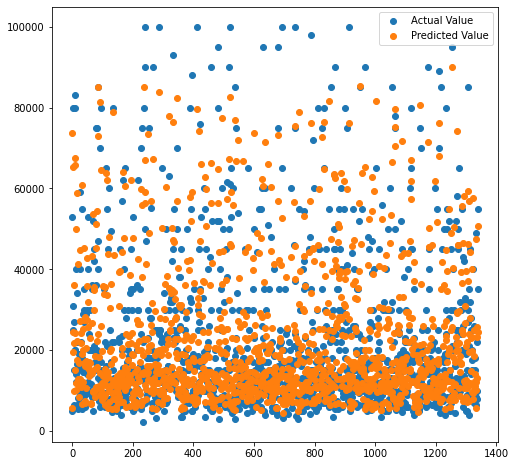

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(x=range(len(y_test)), y=y_test)
plt.scatter(x=range(len(y_test)), y=y_pred)
plt.legend(['Actual Value', 'Predicted Value'])
plt.show()

<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:400px">Training the model with tuned Hyperparameters

In [35]:
final_model = RandomForestRegressor(n_estimators=700,
                                    min_samples_split=11,
                                    min_samples_leaf=3,
                                    max_depth=80, random_state=42)

In [36]:
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=80, min_samples_leaf=3, min_samples_split=11,
                      n_estimators=700, random_state=42)

In [37]:
y_pred_1 = final_model.predict(mms_X.transform(X_test.values))
predictions = mms_y.inverse_transform(y_pred_1.reshape(len(y_test), 1))
y_concat = np.concatenate((y_pred.reshape(len(predictions),1), y_test.values.reshape(len(y_test),1)),1)
print(y_concat)

[[ 5767.9   5000.  ]
 [73783.07 53000.  ]
 [19511.48 25000.  ]
 ...
 [13079.28 10000.  ]
 [50774.57 55000.  ]
 [24555.3  35000.  ]]


<h4 style="background-color:rgb(244,164,96);padding:10px 10px 10px;border-radius:5px 25px 25px 5px;width:400px">R2 Score and 99% Confidence Interval

In [38]:
r2_score(predictions, y_test)

0.7024449555005874

In [39]:
from scipy import stats
confidence = 0.99
squared_errors = ((predictions.T[0]) - np.array(y_test).T) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([ 8132.62, 10292.71])

<h1 style="text-align:center;color:rgb(220, 75, 60);font-size:40px">The End!
<h1 style="text-align:center;color:rgb(244,164,96);font-size:25px">Thank You!!<h1/>